<a href="https://colab.research.google.com/github/khbae/trading/blob/master/05_ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive–moving-average model

* https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model
* http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

### Financial Time Series
* measurement of financial variables over time
* example: stock returns, VIX index
* data: $ \{r_1,r_2,...,r_T, ... \} $



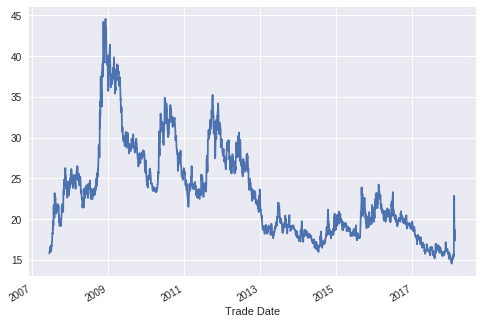

In [0]:
!pip install -q quandl
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

VIX = quandl.get("CHRIS/CBOE_VX7")
VIX['Close'].plot()

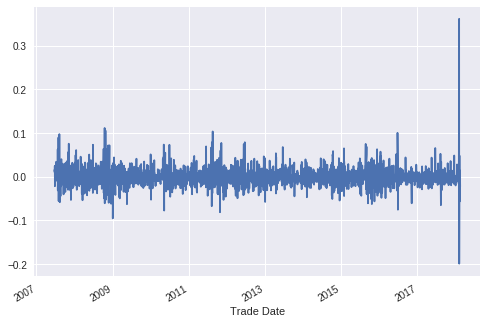

In [0]:
# VIX returns Plot
np.log(VIX['Close']).diff().plot()

## Basic Concepts in Time Series
### Stationarity 
* Strict: distributions are time-invariant
* Weak: first 2 moments are time-invariant

### Basic Statistics
* Mean of returns: $\mu = E(r_t)$
    * Sample mean: $$ \bar{r} = \frac{1}{T} \sum_{t=1}^{T} r_t $$
* Variance of returns: $\text{Var}(r_t) = E[(r_t - \mu)^2] $
    * Sample variance: $$ \text{Var}({r_t}) = \frac{1}{T-1} \sum_{t=1}^{T} (r_t - \bar{r})^2 $$

### Hypothesis Tests

* Test  $H_0 : \mu = 0$ vs. $H_a : \mu \neq 0$
    * $H_0$: Null hypothesis
    * $H_a$: Alternative hypothesis
* Compute t-statistic
$$ t = \frac{\bar{r}}{\text{str}(\bar{r})} = \frac{\bar{r}}{\sqrt{\text{Var}({r_t})/T}} $$
* Compare the t-statistics with N(0,1) distribution when T is large.
* Reject $H_0$ if $ |t| > Z_{\alpha/2} $ or p-value is less than $\alpha$
    * $\alpha$ is significance level
    * If $\alpha  = 0.05$, reject $H_0$ if $t \leq -1.96$ or $t \geq 1.96$
    * If $\alpha  = 0.01$, reject $H_0$ if $t \leq -2.56$ or $t \geq 2.56$

### Lag-k autocovariance:
$$ \gamma_k = Cov(r_k, r_{t-k}) = E[(r_t-\mu)(r_{t-k}-\mu)] $$
   

## Random Walk

$$ x_{t+1} = x_t + \varepsilon_{t+1}  $$,
where $\varepsilon_{t+1}$ is a white noise.

### White Noise
* independent and identically distributed (i.i.d.) sequence 
* zero mean with finite variance
* not predictable
* building block of linear time series models.



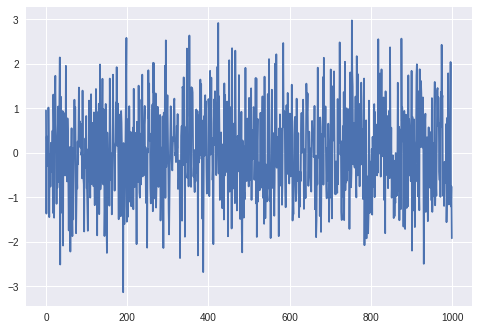

In [0]:
# Generate White Noise;
white = np.random.normal(loc=0,scale=1.0,size=1000)
plt.plot(white)

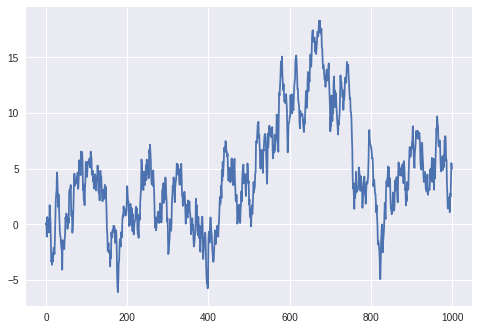

In [0]:
# Generate Random Walk;
white = np.random.normal(loc=0,scale=1.0,size=1000)
X = np.zeros(1000)
X[1:10]

for t in range(1000):
  X[t] = X[t-1] + white[t]
  
plt.plot(X)

## Autoregressive model

"The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term)""

* https://en.wikipedia.org/wiki/Autoregressive_model
* example
    * U.S. quarterly real GNP: $ r_t = 0.005 + 0.35 r_{t-1} + 0.18 r_{t-2} - 0.14 r_{t-3} + \varepsilon_{t} $
    * U.S. monthly unemployment rate: $ r_t = 0.05 + 0.4 r_{t-1} + \varepsilon_{t} $

### AR(1) model

$$ x_{t+1} = \rho \times x_t + \varepsilon_{t+1}  $$,
where $\varepsilon_{t+1}$ is a white noite.

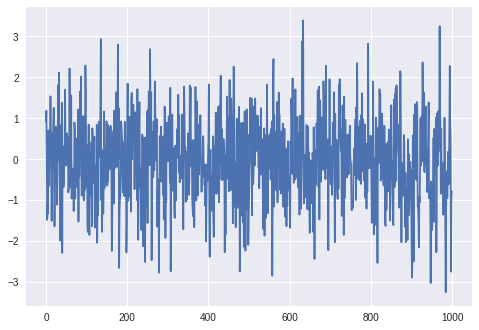

In [0]:
# Generate AR1;
rho = 0.1
white = np.random.normal(loc=0,scale=1.0,size=1000)
AR1 = np.zeros(1000)
AR1[1:10]

for t in range(1000):
  AR1[t] = rho * AR1[t-1] + white[t]
  
plt.plot(AR1)

## Moving-average model
Moving average model has finite memory.

### MA(1) model

$$ x_{t+1} = \varepsilon_{t+1} + \theta \varepsilon_{t}  $$,
where $\varepsilon_{t+1}$ is a white noite.

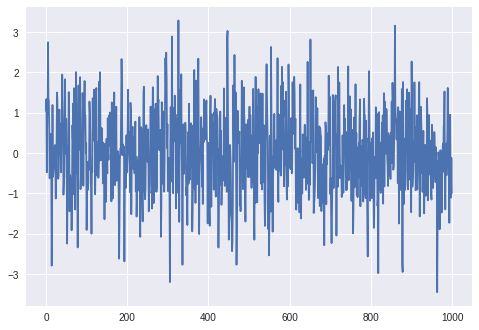

In [0]:
# Generate MA1;
theta = 0.3
white = np.random.normal(loc=0,scale=1.0,size=1000)
MA1 = np.zeros(1000)
MA1[1:10]

for t in range(1000):
  MA1[t] = white[t] + theta * white[t-1]
  
plt.plot(MA1)


In [0]:
# AR model fit, smt package
ARfit = smt.ARMA(endog=AR1,order=(1,0)).fit(trend='nc')
print(ARfit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1436.773
Method:                       css-mle   S.D. of innovations              1.018
Date:                Tue, 20 Feb 2018   AIC                           2877.546
Time:                        10:19:56   BIC                           2887.362
Sample:                             0   HQIC                          2881.277
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.1410      0.031      4.502      0.000       0.080       0.202
                                    Roots                                    
                 Real           Imaginary           M

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [0]:
# MA model fit, smt package
MAfit = smt.ARMA(endog=MA1,order=(0,1)).fit(trend='nc')
print(MAfit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1416.710
Method:                       css-mle   S.D. of innovations              0.998
Date:                Tue, 20 Feb 2018   AIC                           2837.419
Time:                        10:21:25   BIC                           2847.235
Sample:                             0   HQIC                          2841.150
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.2594      0.030      8.739      0.000       0.201       0.318
                                    Roots                                    
                 Real           Imaginary           M

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [0]:
# Generate MA1;


## ARMA model
AR and MA models are mixed.

"In the statistical analysis of time series, autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average."
* https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b03d4effdb520d36cc458ec5c2b231354d29d11a =300x)

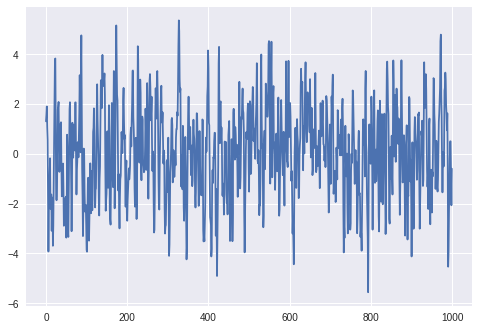

In [0]:
# ARMA(1,1)
rho = 0.5
theta = 0.9
white = np.random.normal(loc=0,scale=1.0,size=1000)
ARMA1 = np.zeros(1000)
ARMA1[1:10]

for t in range(1000):
  ARMA1[t] = rho*ARMA1[t-1] + white[t] + theta * white[t-1]

plt.plot(ARMA1)

In [0]:
ARMAfit = smt.ARMA(endog=ARMA1,order=(1,1)).fit(trend='nc')
print(ARMAfit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -1414.941
Method:                       css-mle   S.D. of innovations              0.995
Date:                Tue, 20 Feb 2018   AIC                           2835.881
Time:                        10:25:52   BIC                           2850.604
Sample:                             0   HQIC                          2841.477
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.4611      0.029     15.966      0.000       0.404       0.518
ma.L1.y        0.9204      0.013     72.933      0.000       0.896       0.945
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


### AR model fitting
* Partial autocorrelation function (PACF)
    * PACF cuts off at lag $p$ for an AR(p) model
* Akaike information criterion (AIC)
    * Find the AR order with minimum AIC
* Bayesian information criterion (BIC)
    * Find the AR order with minimum BIC

### MA model fitting
* Check sample ACF.
    * if sample ACFs are all small after lag $q$, then use MA($q$)
* Use Maximum Likelihood Estimation Method.
* Fit the model to produce residuals close to white noise.
